In [1]:
%matplotlib inline
import pandas as pd

In [2]:
elenco = pd.read_csv('/Users/mertatalay/Desktop/programacionII/data/cast.csv', encoding='utf-8')
elenco.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


In [3]:
flanz = pd.read_csv('/Users/mertatalay/Desktop/programacionII/data/release_dates.csv', encoding='utf-8')
flanz.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#Beings,2015,Romania,2015-01-29
2,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21
3,#Horror,2015,USA,2015-11-20
4,#Horror,2015,UK,2016-05-16


In [4]:
flanz = pd.read_csv('/Users/mertatalay/Desktop/programacionII/data/release_dates.csv' , parse_dates=['date'], infer_datetime_format=True)
flanz.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#Beings,2015,Romania,2015-01-29
2,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21
3,#Horror,2015,USA,2015-11-20
4,#Horror,2015,UK,2016-05-16


In [6]:
f = flanz

f.date.dt.year

0         2007
1         2015
2         2015
3         2015
4         2016
          ... 
443551    2005
443552    2005
443553    2005
443554    2005
443555    2005
Name: date, Length: 443556, dtype: int64

<AxesSubplot:>

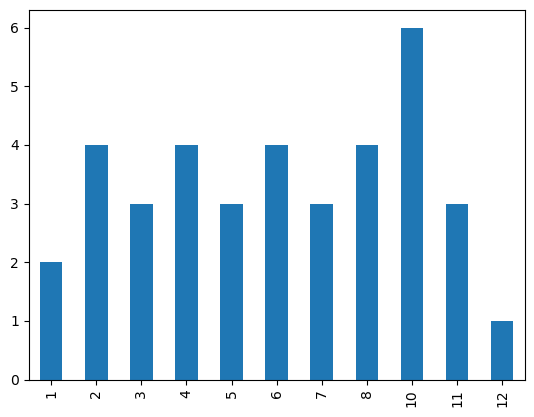

In [7]:
f = flanz 


f = f[(f.title.str.contains('horror',case=False)) & (f.country == 'USA')]

f.date.dt.month.value_counts().sort_index().plot(kind='bar')

In [8]:
f = elenco
f = f[f.name == "Pamela Anderson"]
f.head()

,title,year,name,type,character,n
2435670,Barb Wire,1996,Pamela Anderson,actress,Barb Wire,26.0
2435671,Blonde and Blonder,2007,Pamela Anderson,actress,Dee Twiddle,1.0
2435672,Borat: Cultural Learnings of America for Make ...,2006,Pamela Anderson,actress,Herself - Autograph Signing,NaN
2435673,Chto tvoryat muzhchiny! 2,2015,Pamela Anderson,actress,Pamela Anderson,NaN
2435674,Costa Rican Summer,2010,Pamela Anderson,actress,Pamela Anderson,2.0


In [9]:
f = flanz
f.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#Beings,2015,Romania,2015-01-29
2,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21
3,#Horror,2015,USA,2015-11-20
4,#Horror,2015,UK,2016-05-16


In [10]:
l = elenco

l = l[l.name == "Denzel Washington"]

l = l.merge(flanz)
l

,title,year,name,type,character,n,country,date
0,2 Guns,2013,Denzel Washington,actor,Bobby,1.0,Thailand,2013-08-01
1,2 Guns,2013,Denzel Washington,actor,Bobby,1.0,Canada,2013-08-02
2,2 Guns,2013,Denzel Washington,actor,Bobby,1.0,Turkey,2013-08-02
3,2 Guns,2013,Denzel Washington,actor,Bobby,1.0,USA,2013-08-02
4,2 Guns,2013,Denzel Washington,actor,Bobby,1.0,Iceland,2013-08-08
...,...,...,...,...,...,...,...,...
1380,Virtuosity,1995,Denzel Washington,actor,Lt. Parker Barnes,1.0,Greece,1996-01-05
1381,Virtuosity,1995,Denzel Washington,actor,Lt. Parker Barnes,1.0,Brazil,1996-02-16
1382,Virtuosity,1995,Denzel Washington,actor,Lt. Parker Barnes,1.0,UK,1996-05-31
1383,Virtuosity,1995,Denzel Washington,actor,Lt. Parker Barnes,1.0,Japan,1996-06-08


In [11]:
fl = flanz 
fl = fl[fl.title.str.startswith("Terminator")]

fl = fl[(fl.country == "Mexico") | (fl.country == "USA") | (fl.country == "Canada")]
fl 

,title,year,country,date
330912,Terminator 2: Judgment Day,1991,Canada,1991-07-03
330913,Terminator 2: Judgment Day,1991,USA,1991-07-03
330942,Terminator 3: Rise of the Machines,2003,Canada,2003-07-02
330943,Terminator 3: Rise of the Machines,2003,USA,2003-07-02
330971,Terminator 3: Rise of the Machines,2003,Mexico,2003-07-25
331018,Terminator Genisys,2015,Canada,2015-07-01
331030,Terminator Genisys,2015,USA,2015-07-01
331058,Terminator Genisys,2015,Mexico,2015-07-03
331091,Terminator Salvation,2009,Canada,2009-05-21
331094,Terminator Salvation,2009,USA,2009-05-21


In [12]:
i = flanz 
i = i[i.title.str.startswith("Harry Potter")]
i = i[(fl.country == "Mexico") | (i.country == "USA") | (i.country == "Canada")]


i = i.pivot('title','country','date')
i

/var/folders/tl/r6q59dw53fs4qqzpft2f1__m0000gn/T/ipykernel_35686/2704273927.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  i = i[(fl.country == "Mexico") | (i.country == "USA") | (i.country == "Canada")]
/var/folders/tl/r6q59dw53fs4qqzpft2f1__m0000gn/T/ipykernel_35686/2704273927.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  i = i.pivot('title','country','date')


country,Canada
title,
Harry Potter and the Chamber of Secrets,2002-11-15
Harry Potter and the Deathly Hallows: Part 1,2010-11-19
Harry Potter and the Deathly Hallows: Part 2,2011-07-15
Harry Potter and the Goblet of Fire,2005-11-18
Harry Potter and the Half-Blood Prince,2009-07-15
Harry Potter and the Order of the Phoenix,2007-07-11
Harry Potter and the Prisoner of Azkaban,2004-06-04
Harry Potter and the Sorcerer's Stone,2001-11-16


<AxesSubplot:>

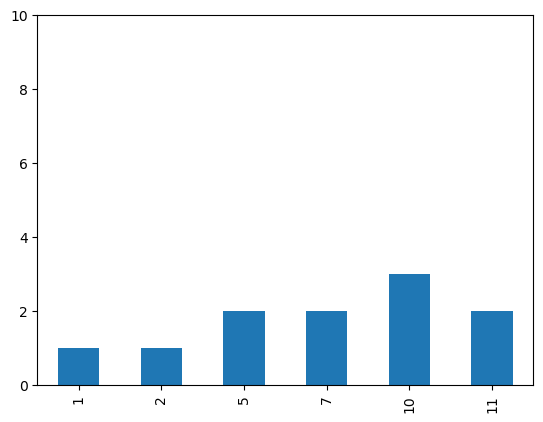

In [13]:
p = flanz
p = p[p.country == 'USA']

t = elenco
t = t[t.name == 'Andrew Garfield']
t = t[(t.year > 1990)]

t = t.merge(p)

t['month'] = t.date.dt.month
t

t.month.value_counts().sort_index().plot(kind='bar',ylim=[0,10])

<AxesSubplot:>

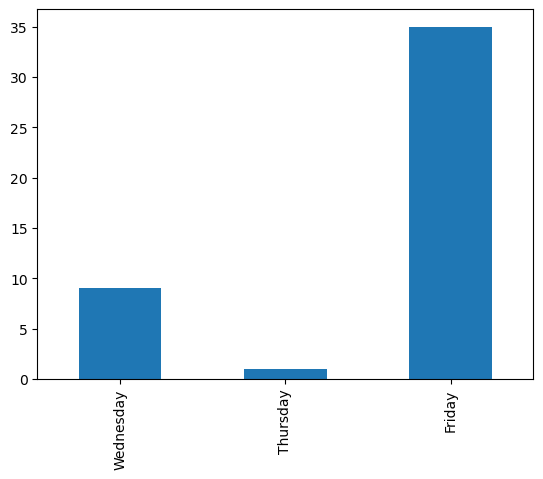

In [14]:
u = flanz
u = u[u.country == 'USA']

e = elenco
e = e[ (e.name == 'Tom Cruise') ] 
wd = e.merge(u).date.dt.dayofweek.value_counts().sort_index()
wd


wd = wd.rename({4:'Friday', 3:'Thursday', 2:'Wednesday'})
wd.plot(kind='bar')

<AxesSubplot:ylabel='title,year'>

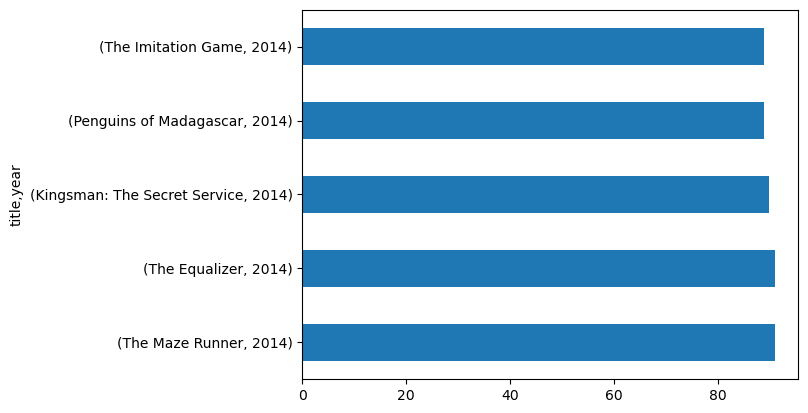

In [15]:
fl = flanz

fl = fl.groupby(['title','year'])
fl.size().sort_values(ascending=False)[:5].plot(kind='barh')

In [22]:
g = elenco
hf = g[(g.name == 'Tom Cruise') & (g.n == 1)]
er = g[(g.n > 1)]
mt = hf.merge(er,on=['title','year'])
mt.groupby(['name_x','name_y']).size().sort_values(ascending=False)

name_x      name_y            
Tom Cruise  Ving Rhames           4
            Nicole Kidman         3
            Ana Maria Quintana    3
            Simon Pegg            3
            William Mapother      3
                                 ..
            Graydon Gould         1
            Goran Navojec         1
            Golde Starger         1
            Glenn Frey            1
            Zoe Quist             1
Length: 1475, dtype: int64